### Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
from keras.utils import plot_model


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [5]:
!pip install visualkeras
!pip install ann_visualizer
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 18.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4169 sha256=786df9414c591bbd35edd098e102ad344cd5c94cadfe6b7208257e28567edff2
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [6]:
!pip install git+https://github.com/jfilter/split-folders.git


  Cloning https://github.com/jfilter/split-folders.git to /tmp/pip-req-build-j6h0f14j
  Running command git clone --filter=blob:none --quiet https://github.com/jfilter/split-folders.git /tmp/pip-req-build-j6h0f14j
  Resolved https://github.com/jfilter/split-folders.git to commit c566dbd56a1097e1ddba2de5dfb93bd67eade54f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for split-folders: filename=split_folders-0.5.1-py3-none-any.whl size=8394 sha256=c446c34418b9a2f848aec039aa6df18c12274b0c3582f3996c6f5321d20d8df0
  Stored in directory: /tmp/pip-ephem-wheel-cache-oz8_fu8m/wheels/0c/da/06/fcebe493adfe604ee9a1d4511e3932a6e63a044edb7a10dec8
Successfully built split-folders


In [7]:
import splitfolders

# Set the path of the directory containing the original images
input_folder = '/kaggle/input/alzheimer-mri-dataset/Dataset'

# Set the base directory for the split images
output_folder = '/kaggle/working/Splitted'

# Set the ratio of images for each split
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Use the splitfolders library to split the images into train-validation-test sets
splitfolders.ratio(input_folder, output_folder, seed=42,
                   ratio=(train_ratio,
                          validation_ratio,
                          test_ratio))


Copying files: 6400 files [00:26, 243.64 files/s]


#  **Data Preprocessing**

In [8]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 16
IMG_SIZE = (128, 128)
SEED = 1345

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        )
       
validation_datagen = ImageDataGenerator(rescale=1./255)


test_datagen = ImageDataGenerator(rescale=1./255)

# Define directories for train, validation, and test sets
train_dir = '/kaggle/working/Splitted/train'
validation_dir = '/kaggle/working/Splitted/val'
test_dir = '/kaggle/working/Splitted/test'

# Define generators for train and validation sets using flow_from_directory
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical')

# Define generator for test set using flow_from_directory
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size =64,
        class_mode ='categorical')

epochs = 50


Found 5119 images belonging to 4 classes.
Found 639 images belonging to 4 classes.
Found 642 images belonging to 4 classes.


In [9]:
train_generator_resnet = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical')
train_generator_inception = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical')

validation_generator_resnet =  validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical')
validation_generator_inception =  validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical')

#train_generator_fused = zip(train_generator_resnet, train_generator_inception)
#validation_generator_fused = zip(validation_generator_resnet, validation_generator_inception)

Found 5119 images belonging to 4 classes.
Found 5119 images belonging to 4 classes.
Found 639 images belonging to 4 classes.
Found 639 images belonging to 4 classes.


In [10]:
def combined_generator(generator1, generator2):
    while True:
        batch1 = next(generator1)
        batch2 = next(generator2)
        yield [batch1[0], batch2[0]], batch1[1]  # Combine the input batches and keep the labels the same

train_generator_fused = combined_generator(train_generator_resnet, train_generator_inception)
validation_generator_fused = combined_generator(validation_generator_resnet, validation_generator_inception)


In [11]:
# class_names = train_generator.class_names
# class_names

class_names = list(train_generator.class_indices.keys())
class_names



['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

# **Data Visualization**

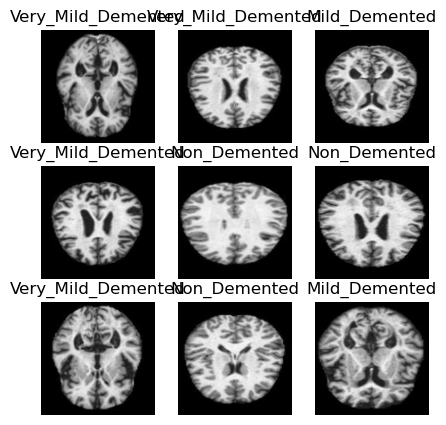

In [12]:
plt.figure(figsize=(5, 5))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break


## Data Augmentation

In [13]:
#preprocessing for rotation and zoom
def data_augmentar():
   
    data_augmentation = Sequential()
    data_augmentation.add(RandomRotation(factor=(-0.15, 0.15)))
    data_augmentation.add(RandomZoom((-0.3, -0.1)))
    
    return data_augmentation

In [14]:
data_augmentation = data_augmentar()
assert(data_augmentation.layers[0].name.startswith('random_rotation'))
assert(data_augmentation.layers[0].factor == (-0.15, 0.15))
assert(data_augmentation.layers[1].name.startswith('random_zoom'))
assert(data_augmentation.layers[1].height_factor == (-0.3, -0.1))

## Solving Imbalanced Data Problem

In [15]:
## Calculate number of samples in each class.
input_folder = '/kaggle/input/alzheimer-mri-dataset/Dataset'
class_counts = dict()
for folder in class_names:
    class_counts[folder] = len(os.listdir(input_folder+'/'+folder))

class_counts

{'Mild_Demented': 896,
 'Moderate_Demented': 64,
 'Non_Demented': 3200,
 'Very_Mild_Demented': 2240}

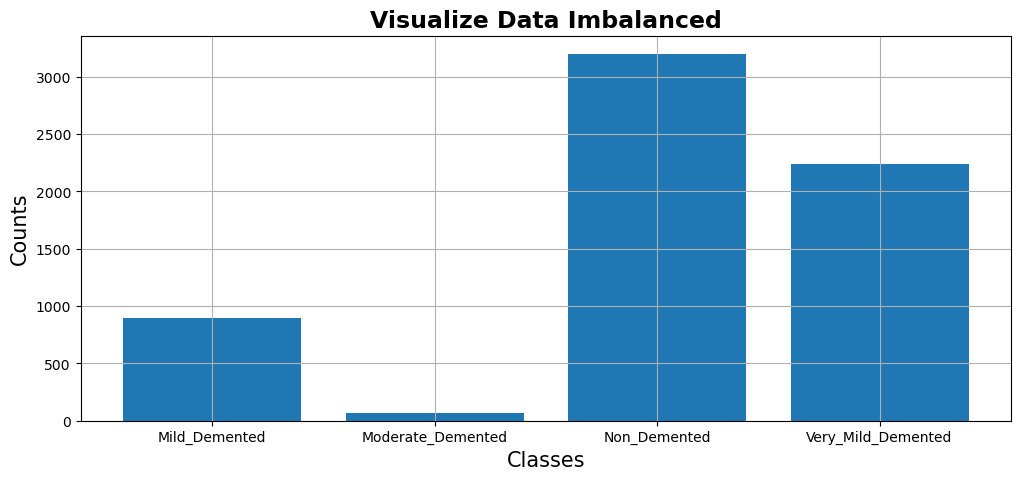

In [16]:
plt.figure(figsize=(12,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes', fontdict={'fontsize':15})
plt.ylabel('Counts', fontdict={'fontsize':15})
plt.title('Visualize Data Imbalanced', fontdict={'fontsize':17,
                                                 'fontweight':'bold'})
plt.grid(True)
plt.show()

In [17]:
# Class_weight = (Total Number of images/Number of class x Images per class )

total = sum(class_counts.values())
number_of_classes = len([ 'MildDemented',
 'ModerateDemented',
 'NonDemented',
 'VeryMildDemented'])

class_weights = dict()
for i in range(number_of_classes):
    class_weights[i] = round(total / (number_of_classes * list(class_counts.values())[i]), 2)
    print(f'Weight for class \"{class_names[i]}\" : {class_weights[i]}')

Weight for class "Mild_Demented" : 1.79
Weight for class "Moderate_Demented" : 25.0
Weight for class "Non_Demented" : 0.5
Weight for class "Very_Mild_Demented" : 0.71


In [18]:
models=[]
acc=[]

#  **ResNet50**

In [19]:
base_model_2 = tf.keras.applications.ResNet50(input_shape=(128,128,3),
                                               include_top=False,
                                               weights='imagenet')
base_model_2.trainable = False


94765736/94765736 [==============================] - 0s 0us/step


In [20]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = keras.layers.Dense(4,activation='softmax')

model2 = tf.keras.Sequential([base_model_2, global_average_layer,
  keras.layers.BatchNormalization(),  
  keras.layers.Dense(2048, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  prediction_layer
])


In [21]:

model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy', 
                        tf.keras.metrics.AUC(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        ])


# Train your model with mixed precision
history3 = model2.fit(train_generator,
                    validation_data= validation_generator,
                    steps_per_epoch=len(train_generator),
                    epochs = epochs,
                    verbose=1)


Epoch 1/50
80/80 [==============================] - 34s 286ms/step - loss: 0.9720 - accuracy: 0.5317 - auc: 0.8192 - precision: 0.6341 - recall: 0.3325 - val_loss: 1.0146 - val_accuracy: 0.5086 - val_auc: 0.8203 - val_precision: 0.8291 - val_recall: 0.1518
Epoch 2/50
80/80 [==============================] - 21s 265ms/step - loss: 0.8756 - accuracy: 0.5911 - auc: 0.8550 - precision: 0.6833 - recall: 0.4151 - val_loss: 1.0107 - val_accuracy: 0.4977 - val_auc: 0.8195 - val_precision: 0.5484 - val_recall: 0.4695
Epoch 3/50
80/80 [==============================] - 21s 265ms/step - loss: 0.8340 - accuracy: 0.6027 - auc: 0.8692 - precision: 0.6941 - recall: 0.4729 - val_loss: 0.9941 - val_accuracy: 0.5149 - val_auc: 0.8326 - val_precision: 0.7326 - val_recall: 0.3302
Epoch 4/50
80/80 [==============================] - 21s 257ms/step - loss: 0.8049 - accuracy: 0.6251 - auc: 0.8783 - precision: 0.7034 - recall: 0.5013 - val_loss: 0.9328 - val_accuracy: 0.5462 - val_auc: 0.8490 - val_precision: 

In [22]:
models.append("ResNet50")
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 256)              

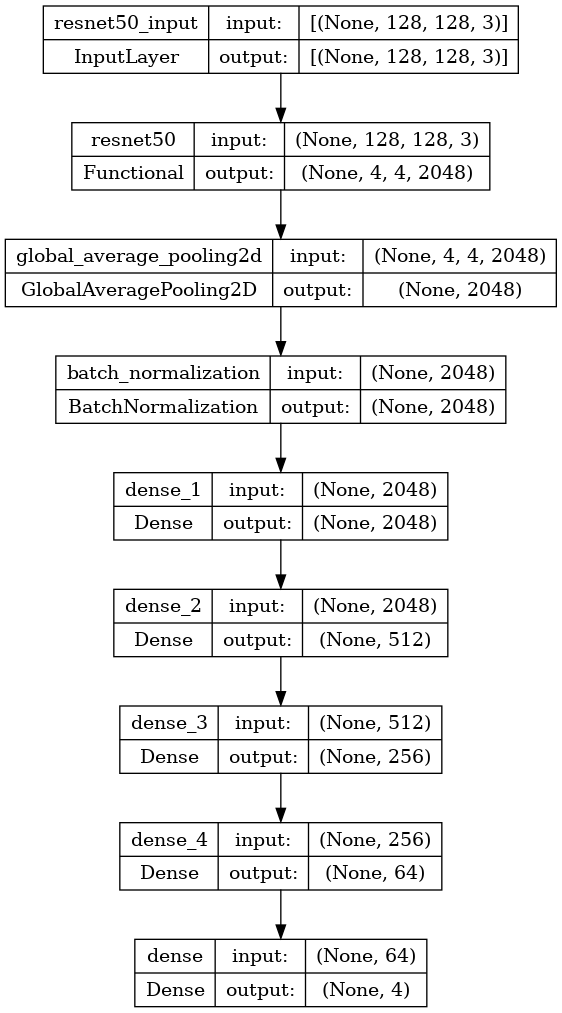

In [23]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='modelResNet50_plot.png', show_shapes=True, show_layer_names=True)

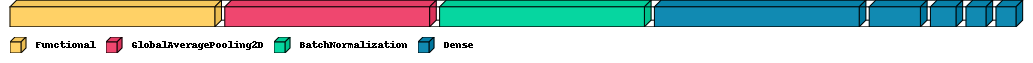

In [24]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model2, legend=True)

In [26]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

# **Plotting Results**

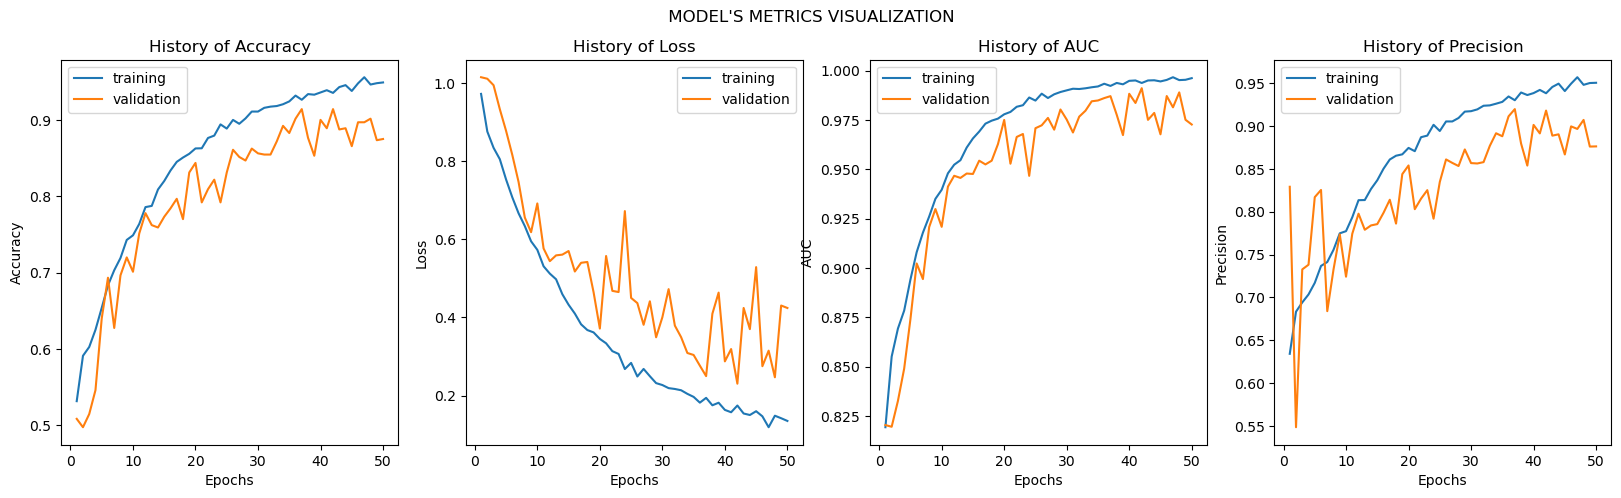

In [28]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,):
    
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
  


    plt.show()
    

Train_Val_Plot(history3.history['accuracy'],history3.history['val_accuracy'],
               history3.history['loss'],history3.history['val_loss'],
               history3.history['auc'],history3.history['val_auc'],
               history3.history['precision'],history3.history['val_precision']
              )

In [29]:
result = model2.evaluate(train_generator)
train_loss = result[0]
train_accuracy = result[1]
train_AUC = result[2]
train_pre = result[3]
train_rec = result[4]
print(f'Train Loss = {train_loss}')
print(f'Train Accuracy = {train_accuracy}')
print(f'Train AUC = {train_AUC}')
print(f'Train Precision = {train_pre}')
print(f'Train Recall = {train_rec}')


80/80 [==============================] - 21s 257ms/step - loss: 0.0951 - accuracy: 0.9662 - auc: 0.9980 - precision: 0.9675 - recall: 0.9641
Train Loss = 0.0950620248913765
Train Accuracy = 0.9662043452262878
Train AUC = 0.9980261325836182
Train Precision = 0.9674573540687561
Train Recall = 0.9640554785728455


In [30]:
filepath = './Resnet50_best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [31]:
history2=model2.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator)//32,
                        epochs = 20,callbacks = callback_list,
                        verbose = 1,batch_size=16)

Epoch 1/20
2/2 [==============================] - ETA: 0s - loss: 0.1199 - accuracy: 0.9453 - auc: 0.9972 - precision: 0.9453 - recall: 0.9453
Epoch 1: val_accuracy improved from -inf to 0.87480, saving model to ./Resnet50_best_weights.hdf5
2/2 [==============================] - 2s 2s/step - loss: 0.1199 - accuracy: 0.9453 - auc: 0.9972 - precision: 0.9453 - recall: 0.9453 - val_loss: 0.4348 - val_accuracy: 0.8748 - val_auc: 0.9741 - val_precision: 0.8748 - val_recall: 0.8748
Epoch 2/20
2/2 [==============================] - ETA: 0s - loss: 0.1120 - accuracy: 0.9375 - auc: 0.9979 - precision: 0.9375 - recall: 0.9375
Epoch 2: val_accuracy did not improve from 0.87480
2/2 [==============================] - 1s 940ms/step - loss: 0.1120 - accuracy: 0.9375 - auc: 0.9979 - precision: 0.9375 - recall: 0.9375 - val_loss: 0.4494 - val_accuracy: 0.8701 - val_auc: 0.9726 - val_precision: 0.8728 - val_recall: 0.8701
Epoch 3/20
2/2 [==============================] - ETA: 0s - loss: 0.1227 - accurac

In [32]:
model2.evaluate(test_generator)

11/11 [==============================] - 1s 84ms/step - loss: 0.3243 - accuracy: 0.9003 - auc: 0.9817 - precision: 0.9028 - recall: 0.8972


[0.3243462145328522,
 0.9003115296363831,
 0.9816888570785522,
 0.9028213024139404,
 0.8971962332725525]

In [33]:
result = model2.evaluate(test_generator)
test_loss = result[0]
test_accuracy = result[1]
test_AUC = result[2]
test_pre = result[3]
test_rec = result[4]
print(f'Test Loss = {test_loss}')
print(f'Test Accuracy = {test_accuracy}')
print(f'Test AUC = {test_AUC}')
print(f'Test Precision = {test_pre}')
print(f'Test Recall = {test_rec}')
acc.append(test_accuracy*100)

11/11 [==============================] - 1s 46ms/step - loss: 0.3243 - accuracy: 0.9003 - auc: 0.9817 - precision: 0.9028 - recall: 0.8972
Test Loss = 0.3243464231491089
Test Accuracy = 0.9003115296363831
Test AUC = 0.9816888570785522
Test Precision = 0.9028213024139404
Test Recall = 0.8971962332725525


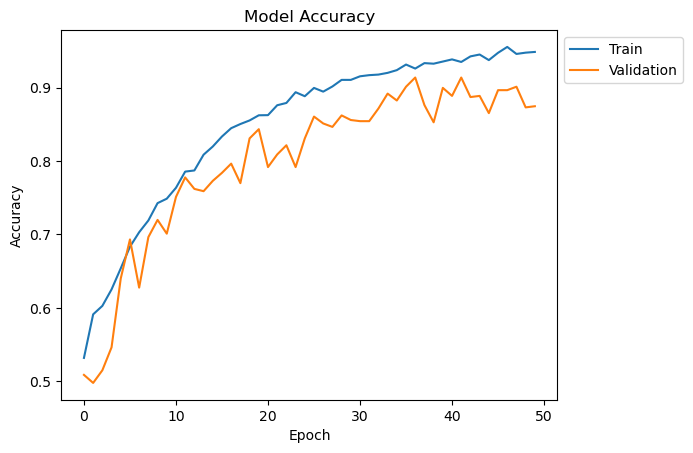

In [39]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [34]:
# Generate predictions
train_predictions = model2.predict(train_generator)
train_predicted_labels = np.argmax(train_predictions, axis=1)
train_true_labels = train_generator.classes

validation_predictions = model2.predict(validation_generator)
validation_predicted_labels = np.argmax(validation_predictions, axis=1)
validation_true_labels = validation_generator.classes

test_predictions = model2.predict(test_generator)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes

# Calculate confusion matrices
train_cm = confusion_matrix(train_true_labels, train_predicted_labels)
validation_cm = confusion_matrix(validation_true_labels, validation_predicted_labels)
test_cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Define class labels (modify based on your specific problem)
class_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

11/11 [==============================] - 1s 45ms/step


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# **Confusion Matrix**

Confusion matrix, without normalization


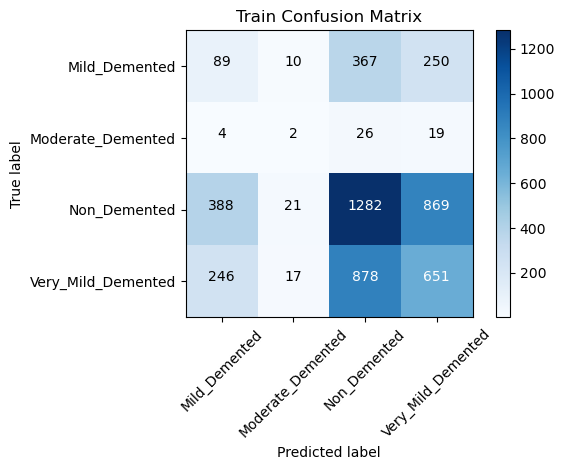

Confusion matrix, without normalization


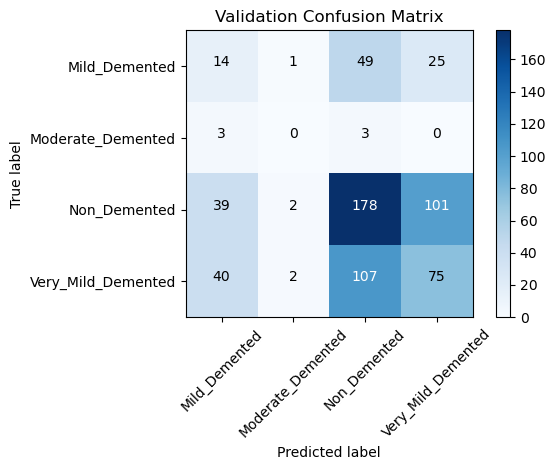

Confusion matrix, without normalization


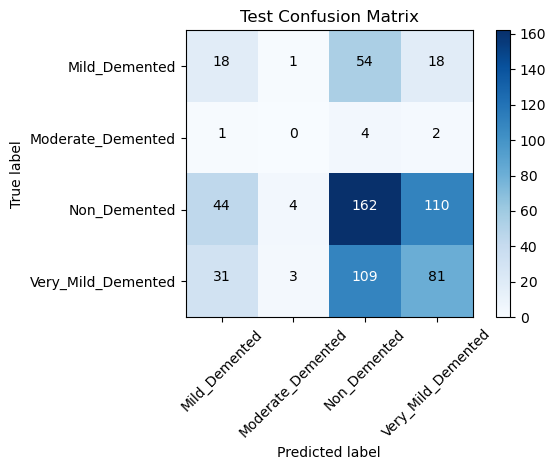

In [38]:
import itertools
# Calculate confusion matrices
train_cm = confusion_matrix(train_true_labels, train_predicted_labels)
validation_cm = confusion_matrix(validation_true_labels, validation_predicted_labels)
test_cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Define class labels (modify based on your specific problem)
class_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

# Plot confusion matrices
plot_confusion_matrix(train_cm, classes=class_labels, title='Train Confusion Matrix')
plt.show()

plot_confusion_matrix(validation_cm, classes=class_labels, title='Validation Confusion Matrix')
plt.show()

plot_confusion_matrix(test_cm, classes=class_labels, title='Test Confusion Matrix')
plt.show()